# Neural Networks

For this exercise, we will create a simple neural network example in an AWS SageMaker notebook. We will use a synthetic dataset to predict whether a customer will make a purchase based on two features:

1. Website visit duration
2. Number of pages visited.

This is a **binary classification problem**, and we'll use a small neural network for quick execution.

**conda_tensorflow2_p310 kernel** Tensorflow kernel is needed because it is a deep learning framework and it is going to allow us to neural network for the exercise.

## Step 1: Generate Synthetic Data

In [1]:
import numpy as np  # handle numerical computations and generate random data
import pandas as pd  # for data manipulation, particularly to handle data as a table (DataFrame)
import warnings  # suppress unwanted warning messages during execution.

# Suppress warnings to avoid cluttering the output with non-critical messages
warnings.filterwarnings('ignore')

In [2]:
# Generating synthetic data
np.random.seed(0)  # Set the seed for reproducibility so results are consistent across runs
data_size = 200  # Set the number of data points to generate

# Create random feature values (visit duration and pages visited) between 0 and 1 for each data point
features = np.random.rand(data_size, 2)  # 200 rows, 2 columns (two features)

# Generate labels based on a simple rule: if the sum of 'VisitDuration' and 'PagesVisited' > 1, classify as purchase (1), otherwise no purchase (0)
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase label is binary (1 or 0)

print(features)

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  0.11872772]


In [3]:
print(labels)

[1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0]


In [4]:
# Convert the features to a pandas DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])

# Add the generated labels as a new column 'Purchase' in the DataFrame
df['Purchase'] = labels

print(df)

     VisitDuration  PagesVisited  Purchase
0         0.548814      0.715189         1
1         0.602763      0.544883         1
2         0.423655      0.645894         1
3         0.437587      0.891773         1
4         0.963663      0.383442         1
..             ...           ...       ...
195       0.062713      0.424032         0
196       0.258684      0.849038         1
197       0.033305      0.958983         0
198       0.355369      0.356707         0
199       0.016329      0.185232         0

[200 rows x 3 columns]


## Step 2: Preprocess the Data

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X = features (VisitDuration and PagesVisited), y = target labels (Purchase)
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

## Step 3: Build and Train the Neural Network

### Model Definition:

<ul>
    <li>The model is a <b>Sequential neural network</b>, meaning the layers are stacked one after another.</li>
    <li>The first Dense layer has 10 neurons and uses the <b>ReLU activation function (relu)</b>, which is commonly used in hidden layers for introducing non-linearity.</li>
    <li>The output layer has 1 neuron with <b>sigmoid activation</b>, used for binary classification to return a probability between 0 and 1 (since the task is to predict purchase/no-purchase).</li>
</ul> 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a Sequential model: layers will be added one after another
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # First hidden layer with 10 neurons, ReLU activation
                                                      # Input shape is 2 because we have 2 features (VisitDuration and PagesVisited)
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron, sigmoid activation for binary classification (output is between 0 and 1)
])

2024-10-20 07:43:13.454483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 07:43:13.496642: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 07:43:13.496687: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 07:43:13.530174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 07:43:14.694930: W tensorflow/com

### Model Compilation:

<ul>
    <li>The <b>Adam optimizer</b> is a gradient-based optimization technique that adjusts the learning rate during training to improve performance.</li>
    <li><b>Binary cross-entropy</b> is the loss function used for binary classification tasks.</li>
    <li><b>Accuracy</b> is the metric to track how well the model is performing during training and evaluation.</li>
</ul>

In [7]:
# Compile the model
# Optimizer: Adam (adaptive learning rate optimization algorithm)
# Loss: Binary cross-entropy, suitable for binary classification tasks
# Metric: Accuracy to track the performance during training and evaluation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
# Epochs: The number of times the model will see the entire dataset during training (10 iterations)
# Batch size: The number of samples the model will process before updating its weights (10 samples per batch)
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 [==============================] - 18s 2ms/step - loss: 0.6844 - accuracy: 0.5437
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5500
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5688
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5750
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5938
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6062
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6375
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.6500
Epoch 9/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6397 - accuracy: 0.6687
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.6812


## Step 4: Evaluate the Model

In [8]:
# Evaluate the model on the test set to assess its performance
# The model will return the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy to see how well the model performs on unseen data
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 7ms/step - loss: 0.6055 - accuracy: 0.7500
Test Accuracy: 0.75


### Model Accuracy and Loss

<ol>
    <li><b>Model Accuracy</b> is the fraction of predictions our model got right. In the context of the exercise, it is the proportion of correctly predicted purchase decisions (both purchases and non-purchases) out of all predictions made.
        <ul>
            <li><b>Formula</b> - Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
            <li><b>Interpretation</b> - a higher accuracy indicates a better performing model. For example, an accuracy of 0.90 means that 90% of the model's predictions are correct.</li>
        </ul>
    <li><b>Model Loss</b> measures how far the model's predictions are from the actual class labels. It is a measure of the model's error.
        <ul>
            <li><b>Binary Cross-Entropy</b> - is commonly used in binary classification tasks. It calculates the loss for each instance by comparing the predicted probability with the actual label (either 0 or 1), and then takes the average over all instances.
            <li><b>Interpretation</b> - lower loss values are better, indicating that the model's predictions are closer to the actual labels. A high loss value means the model's predictions are far off from the actual labels.</li>
        </ul>
</ol>

#### Visualizing Training Process

Epoch 1/10
13/13 [==============================] - 0s 8ms/step - loss: 0.5799 - accuracy: 0.8203 - val_loss: 0.5555 - val_accuracy: 0.8125
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5747 - accuracy: 0.8281 - val_loss: 0.5493 - val_accuracy: 0.8125
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.5702 - accuracy: 0.8359 - val_loss: 0.5430 - val_accuracy: 0.8438
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.8594 - val_loss: 0.5366 - val_accuracy: 0.8438
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5592 - accuracy: 0.8438 - val_loss: 0.5302 - val_accuracy: 0.8125
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5538 - accuracy: 0.8594 - val_loss: 0.5240 - val_accuracy: 0.8438
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5485 - accuracy: 0.8828 - val_loss: 0.5178 - val_accuracy: 0.8438
Epoch 8/10
13/13 [==

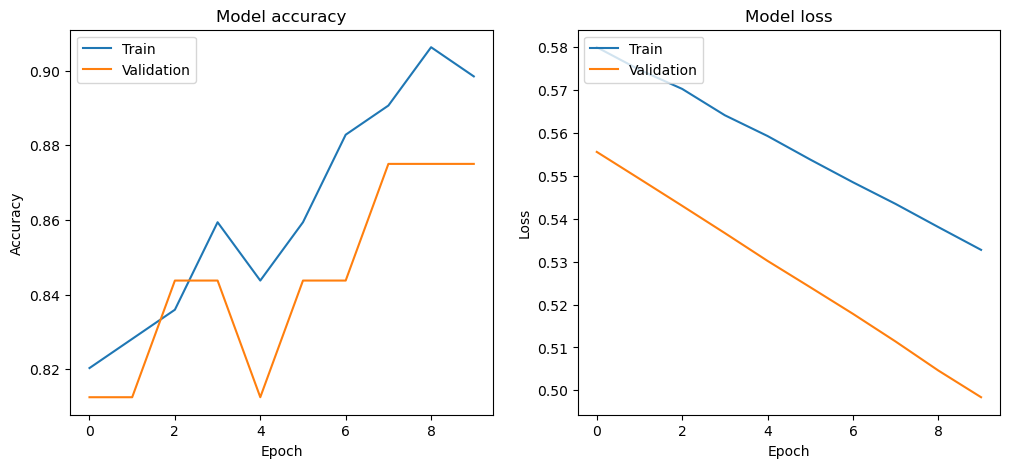

In [11]:
# Suppress warnings to keep the output clean and prevent clutter from non-critical messages
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the training history
# validation_split=0.2 means that 20% of the training data will be used for validation
# The history object will store the accuracy, loss, and validation metrics for each epoch
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt  # Import matplotlib for plotting

plt.figure(figsize=(12, 5))  # Create a figure with a specified size for the plots

# Plot training and validation accuracy values
plt.subplot(1, 2, 1)  # Create a subplot in a 1x2 grid, this will be the first plot
plt.plot(history.history['accuracy'])  # Plot the training accuracy over epochs
plt.plot(history.history['val_accuracy'])  # Plot the validation accuracy over epochs
plt.title('Model accuracy')  # Title for the accuracy plot
plt.ylabel('Accuracy')  # Label for the y-axis
plt.xlabel('Epoch')  # Label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left')  # Add a legend to distinguish between training and validation accuracy

# Plot training and validation loss values
plt.subplot(1, 2, 2)  # Create a second subplot in the 1x2 grid, this will be the second plot
plt.plot(history.history['loss'])  # Plot the training loss over epochs
plt.plot(history.history['val_loss'])  # Plot the validation loss over epochs
plt.title('Model loss')  # Title for the loss plot
plt.ylabel('Loss')  # Label for the y-axis
plt.xlabel('Epoch')  # Label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left')  # Add a legend to distinguish between training and validation loss

# Display the plots
plt.show()

### Decision Boundary

The <b>Decision Boundary</b> is a boundary in the feature space that separates the data points into different classes based on the predictions made by the model. In our exercise, we have two input features: website visit duration and number of pages visited. The decision boundary will be a line or curve in this 2-dimensional space that separates the points predicted to make a purchase (class 1) from those predicted not to make a purchase (class 0).

<ul>
    <li><b>How It's Determined -</b> The neural network learns the decision boundary during training. It adjusts its internal parameters (weights and biases) to correctly classify the training data. The boundary is where the model's output (before applying a threshold) is at some critical value, often 0.5 for binary classification with a sigmoid output. Points on one side of the boundary are classified as one class, and points on the other side as the other class.</li>
    <li><b>Visualization -</b> In the plot, the decision boundary is typically represented by a line or contour. Points falling on one side of the boundary are predicted to be in one class, and those on the other side in the other class. The decision boundary can be linear or non-linear depending on the complexity of the model and the nature of the data.</li>   
</ul>

#### Creating the Visual

313/313 [==============================] - 0s 1ms/step


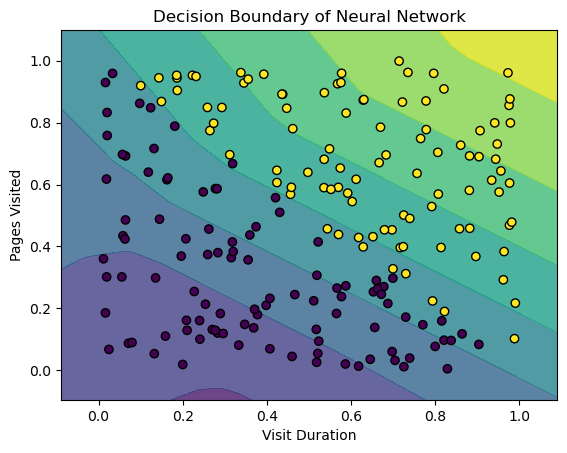

In [12]:
# Generate a grid over the feature space to visualize the decision boundary
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1  # Define the min and max for 'VisitDuration' with a small margin
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1  # Define the min and max for 'PagesVisited' with a small margin

# Create a grid of points over the feature space using numpy's meshgrid function
# linspace creates evenly spaced values between the min and max of the feature range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Generate a grid of 100x100 points

# Predict the output (classification) over the entire grid
# np.c_ is used to combine xx and yy into a 2D array of coordinate pairs
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict the model's output on the flattened grid
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the grid's shape for contour plotting

# Plot the contour map of the decision boundary and the training examples
plt.contourf(xx, yy, Z, alpha=0.8)  # Create a filled contour plot where the colors represent the predicted classes
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')  # Plot the original training data with color based on their actual class labels
plt.xlabel('Visit Duration')  # Label the x-axis
plt.ylabel('Pages Visited')  # Label the y-axis
plt.title('Decision Boundary of Neural Network')  # Add a title to the plot
plt.show()  # Display the plot

Remember, these visualizations are more about understanding the model's structure and learning process rather than explaining its decision-making process in detail, which is more straightforward with models like decision trees.

For more detailed information on some of the more advanced NumPy and MaplotLib:
1. https://numpy.org/doc/stable/reference/index.html#reference
2. https://matplotlib.org/stable/api/index.html